## CLASIFICACION DE MASAS ESTELARES
Se busca predecir si estamos en presencia de una galaxia, una estrella o un Quasar

1. Importaciones y Configuración: En esta sección importamos todas las librerías necesarias para:
- PyTorch: Framework de deep learning
- Scikit-learn: Preprocesamiento y métricas
- NumPy/Matplotlib: Manipulación de datos y visualización
- kagglehub: Importacion del dataset

In [ ]:
# === IMPORTACIONES Y CONFIGURACIÓN INICIAL ===

# Librerías estándar de Python
import os          # Manejo de sistema de archivos
import math        # Operaciones matemáticas
import time        # Medición de tiempo
import numpy as np # Arrays y operaciones numéricas

# PyTorch - Framework de Deep Learning
import torch
import torch.nn as nn                    # Módulos de redes neuronales
import torch.nn.functional as F          # Funciones de activación y pérdida
from torch.utils.data import DataLoader, TensorDataset, Dataset  # Manejo de datos

# Scikit-learn - Preprocesamiento y métricas
from sklearn.preprocessing import StandardScaler           # Normalización de datos
from sklearn.model_selection import train_test_split       # División de datos
from sklearn.impute import SimpleImputer                   # Imputación de valores faltantes
from sklearn.metrics import (mean_absolute_error,          # Métricas de regresión
                             mean_squared_error,
                             r2_score,
                             accuracy_score, 
                             f1_score, 
                             precision_score, 
                             recall_score,
                             confusion_matrix,
                             classification_report)
from sklearn.preprocessing import LabelEncoder

# Imbalanced-learn - Balanceo de clases
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Kagglehub
import zipfile
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de dispositivo
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Device: {DEVICE}')
print(f'PyTorch version: {torch.__version__}')

In [ ]:
# === CARGA DEL DATASET ===

# Descarga el dataset desde Kaggle
dataset_path = kagglehub.dataset_download('fedesoriano/stellar-classification-dataset-sdss17')

print(f'Dataset path: {dataset_path}')

# Buscar archivos ZIP y extraerlos
zip_files = [f for f in os.listdir(dataset_path) if f.endswith('.zip')]
if zip_files:
    print(f'Archivo ZIP encontrado: {zip_files[0]}')
    with zipfile.ZipFile(os.path.join(dataset_path, zip_files[0]), 'r') as zip_ref:
        zip_ref.extractall(dataset_path)
    print('Archivo ZIP extraído exitosamente')

# Buscar y cargar archivos CSV
csv_files = [f for f in os.listdir(dataset_path) if f.endswith('.csv')]
if csv_files:
    csv_path = os.path.join(dataset_path, csv_files[0])
    df = pd.read_csv(csv_path)
    print(f'\n✓ Dataset cargado exitosamente desde: {csv_files[0]}')
    print(f'  Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas')
    print(f'\nPrimeras 5 filas del dataset:')
    display(df.head())
else:
    print('❌ ERROR: No se encontró ningún archivo CSV en el dataset extraído.')
    df = None

## Análisis exploratorio de datos (EDA) - Continuación

Continuamos con el análisis exploratorio para profundizar en la distribución de las características numéricas y visualizar posibles correlaciones entre ellas.

- Distribución de las características numéricas mediante histogramas.
- Matriz de correlación para identificar relaciones lineales entre características.

Primeras 5 Columnas:


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842



Resumen del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: 

,0
obj_ID,0
alpha,0
delta,0
u,0
g,0
r,0
i,0
z,0
run_ID,0
rerun_ID,0



Valores unicos


,count
class,
GALAXY,59445
STAR,21594
QSO,18961


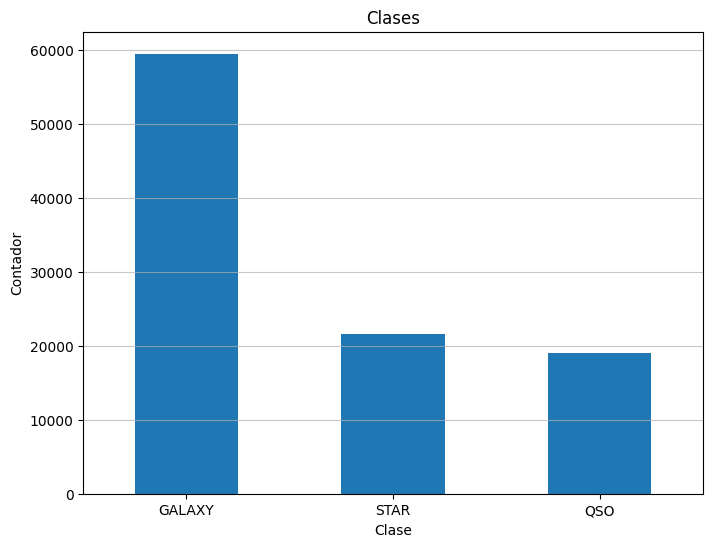

In [ ]:
print("Primeras 5 Columnas:")
display(df.head())

print("\nResumen del dataset:")
df.info()

print("\nValores nulors:")
display(df.isnull().sum())

print("\nValores unicos")
display(df['class'].value_counts())

plt.figure(figsize=(8, 6))
df['class'].value_counts().plot(kind='bar')
plt.title('Clases')
plt.xlabel('Clase')
plt.ylabel('Contador')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.7)
plt.show()


Distribución de Características Numéricas:


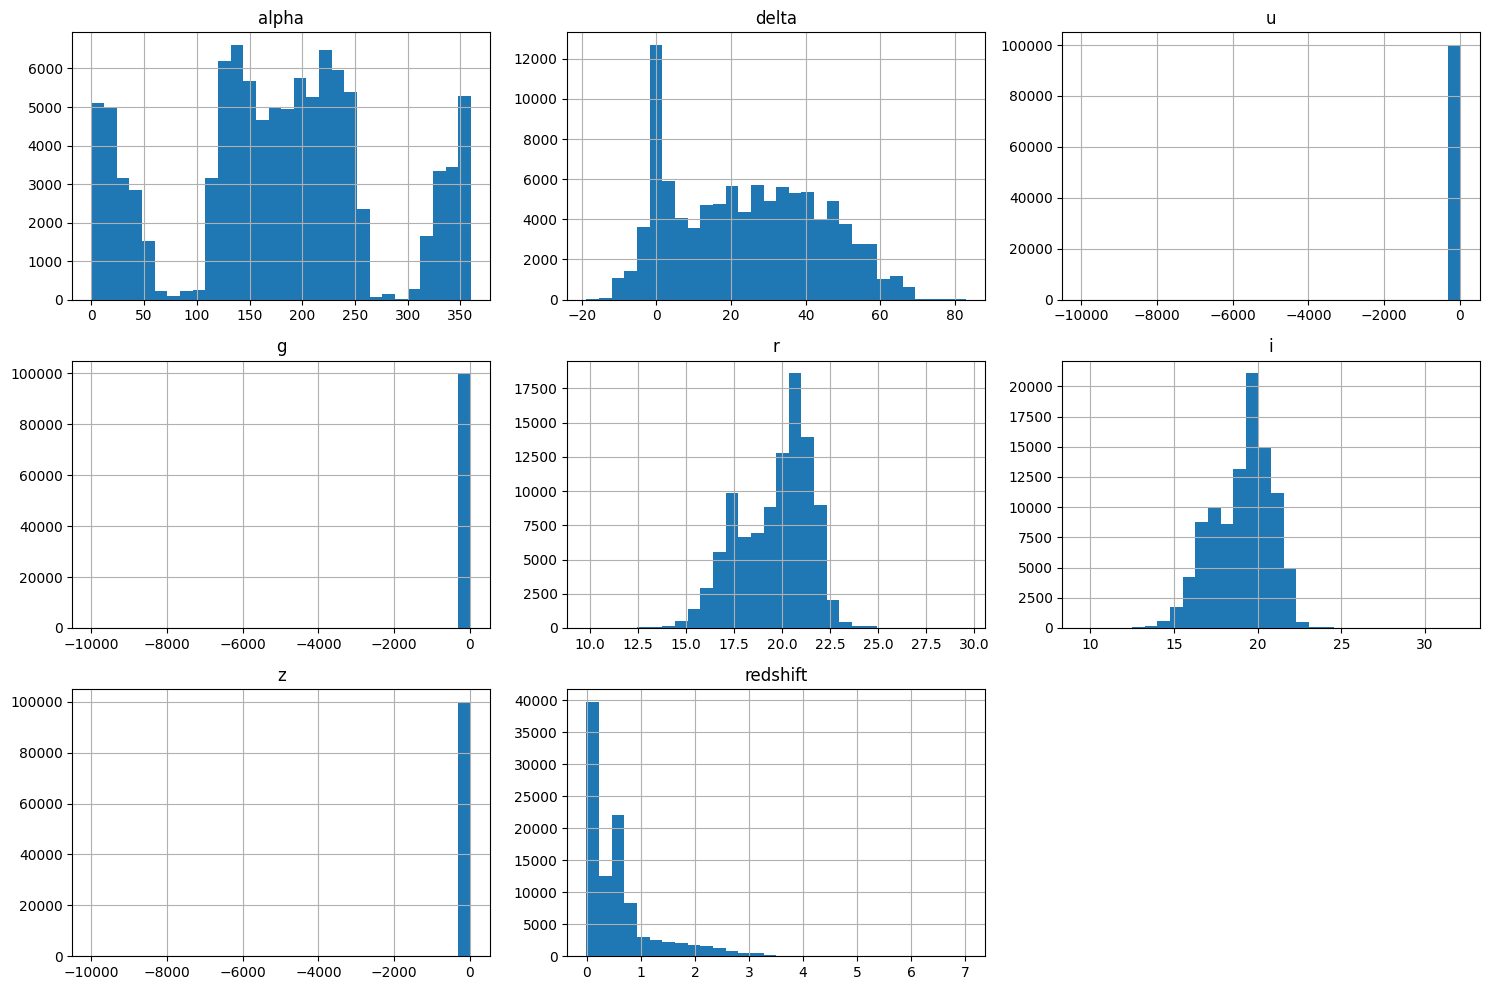


Matriz de Correlación de Características Numéricas:


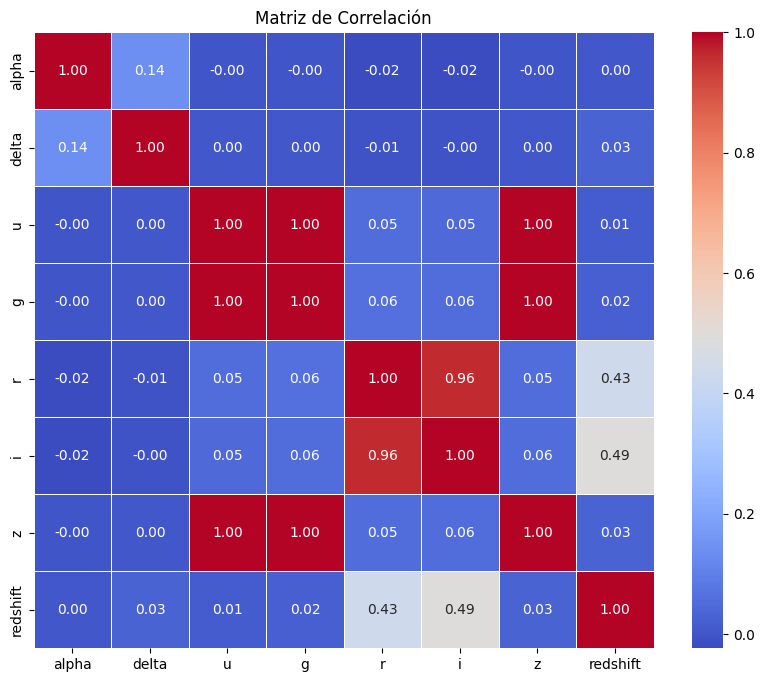


Estadísticas Descriptivas de Características Numéricas:


,alpha,delta,u,g,r,i,z,redshift
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,0.576661
std,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,0.730707
min,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,-0.009971
25%,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,0.054517
50%,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,0.424173
75%,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,0.704154
max,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,7.011245


In [ ]:
# Seleccionar solo las columnas numéricas para histogramas y correlación
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
# Excluir columnas de ID que no son features numéricas
numerical_features_eda = [col for col in numerical_cols if col not in ['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'plate', 'MJD', 'fiber_ID']]

print("\nDistribución de Características Numéricas:")
df[numerical_features_eda].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

print("\nMatriz de Correlación de Características Numéricas:")
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features_eda].corr()
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

# También podemos ver estadísticas descriptivas detalladas para las características numéricas
print("\nEstadísticas Descriptivas de Características Numéricas:")
display(df[numerical_features_eda].describe())

#Preprocesamiento de datos para clasificación
Preparar los datos para el entrenamiento de la red neuronal, incluyendo:

- Manejo de características categóricas (la columna 'class').
- Normalización de características numéricas.
- División del dataset en conjuntos de entrenamiento, validación y prueba.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify features and target
target_col = 'class'
# Exclude identifier columns that are not features
feature_cols = [col for col in df.columns if col not in [target_col, 'obj_ID', 'plate', 'MJD', 'fiber_ID']]

X = df[feature_cols]
y = df[target_col]

# 1. Manejo de características categóricas (la columna 'class').
# Label encode the target variable 'class'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print(f"Original classes: {label_encoder.classes_}")
print(f"Encoded target shape: {y_encoded.shape}")

# Identify numerical features (all remaining features are numerical in this dataset)
numerical_features = X.columns.tolist()
print(f"\nNumerical features: {numerical_features}")

# 5. División del dataset en conjuntos de entrenamiento, validación y prueba.
# Split the data into training+validation and test sets
X_trainval, X_test, y_trainval_encoded, y_test_encoded = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Split the training+validation set into training and validation sets
X_train, X_val, y_train_encoded, y_val_encoded = train_test_split(
    X_trainval, y_trainval_encoded, test_size=0.25, random_state=42, stratify=y_trainval_encoded
) # 0.25 of 0.8 is 0.2

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train_encoded: {y_train_encoded.shape}")
print(f"Shape of y_val_encoded: {y_val_encoded.shape}")
print(f"Shape of y_test_encoded: {y_test_encoded.shape}")

# 3. Normalización de características numéricas.
# Initialize and fit StandardScaler on the numerical features of the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_features])

# 4. Apply the fitted scaler to transform the numerical features in the validation and test sets
X_val_scaled = scaler.transform(X_val[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

print(f"\nShape of X_train_scaled: {X_train_scaled.shape}")
print(f"Shape of X_val_scaled: {X_val_scaled.shape}")
print(f"Shape of X_test_scaled: {X_test_scaled.shape}")

# ============================================================================
# BALANCEO DE CLASES (NUEVO)
# ============================================================================
print(f"\n{'='*80}")
print("BALANCEO DE CLASES EN CONJUNTO DE ENTRENAMIENTO")
print(f"{'='*80}")

# Verificar distribución original de clases en train
unique_train, counts_train = np.unique(y_train_encoded, return_counts=True)
print(f"\nDistribución ORIGINAL en Train:")
for cls, cnt in zip(label_encoder.classes_[unique_train], counts_train):
    print(f"  {cls}: {cnt} muestras ({cnt/len(y_train_encoded)*100:.2f}%)")

# Estrategia de balanceo: IGUALAR TODAS LAS CLASES A 12,956 (tamaño de STAR)
# - GALAXY (clase 0): Undersampling a 12,956 muestras
# - QSO (clase 1): Oversampling a 12,956 muestras
# - STAR (clase 2): Mantener en 12,956 muestras (sin cambios)

TARGET_SAMPLES = 12956  # Número objetivo de muestras por clase

# Aplicar undersampling a GALAXY y luego oversampling a QSO
# Estrategia combinada
sampling_strategy = {
    0: TARGET_SAMPLES,  # GALAXY: undersample a 12,956
    1: TARGET_SAMPLES,  # QSO: oversample a 12,956
    2: TARGET_SAMPLES   # STAR: mantener en 12,956
}

# Primero undersampling
undersampler = RandomUnderSampler(sampling_strategy={0: TARGET_SAMPLES, 2: TARGET_SAMPLES}, random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train_scaled, y_train_encoded)

print(f"\nDespués de UNDERSAMPLING (GALAXY):")
unique_under, counts_under = np.unique(y_train_under, return_counts=True)
for cls, cnt in zip(label_encoder.classes_[unique_under], counts_under):
    print(f"  {cls}: {cnt} muestras ({cnt/len(y_train_under)*100:.2f}%)")

# Luego oversampling a QSO
oversampler = RandomOverSampler(sampling_strategy={1: TARGET_SAMPLES}, random_state=42)
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train_under, y_train_under)

print(f"\nDespués de OVERSAMPLING (QSO) - BALANCEO FINAL:")
unique_final, counts_final = np.unique(y_train_balanced, return_counts=True)
for cls, cnt in zip(label_encoder.classes_[unique_final], counts_final):
    print(f"  {cls}: {cnt} muestras ({cnt/len(y_train_balanced)*100:.2f}%)")

print(f"\nTotal de muestras de entrenamiento:")
print(f"  Original: {len(y_train_encoded)}")
print(f"  Balanceado: {len(y_train_balanced)}")
print(f"  Muestras por clase: {TARGET_SAMPLES}")
print(f"  Número de clases: {len(unique_final)}")
print(f"  Balance perfecto: {len(y_train_balanced) == TARGET_SAMPLES * len(unique_final)}")
print(f"{'='*80}\n")

# IMPORTANTE: Validación y Test NO se modifican para evaluación imparcial

# 6. Convert the resulting NumPy arrays for features and labels into PyTorch TensorDataset objects
# Usamos los datos BALANCEADOS para train
train_dataset = TensorDataset(
    torch.tensor(X_train_balanced, dtype=torch.float32), 
    torch.tensor(y_train_balanced, dtype=torch.long)
)
val_dataset = TensorDataset(
    torch.tensor(X_val_scaled, dtype=torch.float32), 
    torch.tensor(y_val_encoded, dtype=torch.long)
)
test_dataset = TensorDataset(
    torch.tensor(X_test_scaled, dtype=torch.float32), 
    torch.tensor(y_test_encoded, dtype=torch.long)
)

# 7. Print the shapes of the resulting TensorDatasets
print(f"Shape of train_dataset (BALANCED): {train_dataset.tensors[0].shape}, {train_dataset.tensors[1].shape}")
print(f"Shape of val_dataset: {val_dataset.tensors[0].shape}, {val_dataset.tensors[1].shape}")
print(f"Shape of test_dataset: {test_dataset.tensors[0].shape}, {test_dataset.tensors[1].shape}")

In [ ]:
# === VISUALIZACIÓN DEL BALANCEO DE CLASES ===

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Comparación ANTES vs DESPUÉS del balanceo
ax1 = axes[0]
width = 0.35
x = np.arange(len(label_encoder.classes_))

# Antes del balanceo
counts_before = [counts_train[i] for i in range(len(label_encoder.classes_))]
# Después del balanceo
counts_after = [counts_final[i] for i in range(len(label_encoder.classes_))]

bars1 = ax1.bar(x - width/2, counts_before, width, label='Antes', color='#e74c3c', alpha=0.8, edgecolor='black')
bars2 = ax1.bar(x + width/2, counts_after, width, label='Después', color='#2ecc71', alpha=0.8, edgecolor='black')

ax1.set_xlabel('Clase', fontsize=12, fontweight='bold')
ax1.set_ylabel('Número de Muestras', fontsize=12, fontweight='bold')
ax1.set_title('Distribución de Clases: ANTES vs DESPUÉS del Balanceo', fontsize=13, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(label_encoder.classes_)
ax1.legend(fontsize=11)
ax1.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

# Gráfico 2: Porcentaje de distribución
ax2 = axes[1]
labels = label_encoder.classes_
sizes_before = [(count/sum(counts_before))*100 for count in counts_before]
sizes_after = [(count/sum(counts_after))*100 for count in counts_after]

x_pos = np.arange(len(labels))
width = 0.35

bars1 = ax2.bar(x_pos - width/2, sizes_before, width, label='Antes', color='#e74c3c', alpha=0.8, edgecolor='black')
bars2 = ax2.bar(x_pos + width/2, sizes_after, width, label='Después', color='#2ecc71', alpha=0.8, edgecolor='black')

ax2.set_xlabel('Clase', fontsize=12, fontweight='bold')
ax2.set_ylabel('Porcentaje (%)', fontsize=12, fontweight='bold')
ax2.set_title('Porcentaje de Distribución por Clase', fontsize=13, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(labels)
ax2.legend(fontsize=11)
ax2.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('class_balancing_visualization.png', dpi=150, bbox_inches='tight')
plt.show()

print(f'\n{"="*80}')
print('ANÁLISIS DEL BALANCEO DE CLASES')
print(f'{"="*80}')
print(f'\nIMPACTO DEL BALANCEO:')
for i, cls in enumerate(label_encoder.classes_):
    before = counts_before[i]
    after = counts_after[i]
    change = ((after - before) / before) * 100
    print(f'  {cls:8} | Antes: {before:6d} ({sizes_before[i]:5.2f}%) | '
          f'Después: {after:6d} ({sizes_after[i]:5.2f}%) | Cambio: {change:+7.2f}%')
print(f'{"="*80}\n')

---
## EXPERIMENTOS CON DATOS BALANCEADOS

En esta sección ejecutaremos TODOS los experimentos del trabajo original usando los datos balanceados.

**Experimentos a ejecutar:**

1. **Experimento 1: Regularización L2** - Probar 4 valores de weight_decay
2. **Experimento 2: Dropout** - Probar 4 valores de dropout
3. **Experimento 3: Inicializaciones de Pesos** - Probar 3 estrategias (default, Xavier, He)
4. **Experimento 4: Batch Normalization** - Evaluar impacto de BatchNorm
5. **Experimento 5: Bootstrap** - Entrenar 5 modelos con remuestreo
6. **Experimento 6: Ensemble** - Combinar modelos mediante votación

El código está simplificado usando funciones reutilizables para facilitar mantenimiento.

In [ ]:
# === FUNCIONES AUXILIARES Y ARQUITECTURA DEL MODELO ===

def set_seed(seed=42):
    """Establece la semilla aleatoria para reproducibilidad"""
    import random
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

def make_mlp(d_in: int, d_hidden=(64, 64), d_out=3, dropout=0.0, act=nn.ReLU):
    """Construye una red neuronal MLP"""
    layers = []
    d_prev = d_in
    
    for h in d_hidden:
        layers += [nn.Linear(d_prev, h), act()]
        if dropout > 0:
            layers += [nn.Dropout(dropout)]
        d_prev = h
    
    layers += [nn.Linear(d_prev, d_out)]
    return nn.Sequential(*layers)

def init_weights_xavier(m):
    """Inicialización Xavier/Glorot"""
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)

def init_weights_he(m):
    """Inicialización He/Kaiming"""
    if isinstance(m, nn.Linear):
        nn.init.kaiming_uniform_(m.weight, nonlinearity='relu')
        if m.bias is not None:
            nn.init.zeros_(m.bias)

# === ARQUITECTURA DEL MODELO ===
class FFNN_Classifier(nn.Module):
    """Red neuronal feed-forward para clasificación multi-clase"""
    def __init__(self, d0, d_hidden=(64, 64), n_classes=3, dropout=0.0, use_batch_norm=False):
        super().__init__()
        
        self.use_batch_norm = use_batch_norm
        self.layers = nn.ModuleList()
        self.batch_norms = nn.ModuleList()
        
        d_prev = d0
        for h in d_hidden:
            self.layers.append(nn.Linear(d_prev, h))
            if use_batch_norm:
                self.batch_norms.append(nn.BatchNorm1d(h))
            d_prev = h
        
        self.output_layer = nn.Linear(d_prev, n_classes)
        self.dropout = nn.Dropout(dropout) if dropout > 0 else None
    
    def forward(self, x):
        for i, layer in enumerate(self.layers):
            x = layer(x)
            if self.use_batch_norm:
                x = self.batch_norms[i](x)
            x = F.relu(x)
            if self.dropout is not None:
                x = self.dropout(x)
        x = self.output_layer(x)
        return x

# Configuración global
set_seed(42)
d_in_classifier = train_dataset.tensors[0].shape[1]
n_classes = 3

print(f'Input features: {d_in_classifier}')
print(f'Output classes: {n_classes}')
print('Funciones y modelo implementados')

In [ ]:
# === FUNCIONES DE ENTRENAMIENTO Y EVALUACIÓN ===

def fit_classifier(model, train_ds, val_ds, epochs=100, batch_size=64, lr=1e-3,
                   patience=10, min_delta=1e-4, weight_decay=0.0, device=DEVICE):
    """Entrena un modelo de clasificación con early stopping"""
    
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False)
    
    best_val_loss = math.inf
    best_epoch = 0
    epochs_without_improvement = 0
    best_model_state = None
    
    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': []
    }
    
    for epoch in range(epochs):
        # Training
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item() * X_batch.size(0)
            _, predicted = outputs.max(1)
            train_correct += predicted.eq(y_batch).sum().item()
            train_total += y_batch.size(0)
        
        train_loss = train_loss / train_total
        train_acc = train_correct / train_total
        
        # Validation
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                
                val_loss += loss.item() * X_batch.size(0)
                _, predicted = outputs.max(1)
                val_correct += predicted.eq(y_batch).sum().item()
                val_total += y_batch.size(0)
        
        val_loss = val_loss / val_total
        val_acc = val_correct / val_total
        
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        
        # Early stopping
        if val_loss < best_val_loss - min_delta:
            best_val_loss = val_loss
            best_epoch = epoch + 1
            epochs_without_improvement = 0
            best_model_state = model.state_dict().copy()
        else:
            epochs_without_improvement += 1
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoca [{epoch+1:3d}/{epochs}] | '
                  f'Train Loss: {train_loss:.4f}, Acc: {train_acc*100:.2f}% | '
                  f'Val Loss: {val_loss:.4f}, Acc: {val_acc*100:.2f}%')
        
        if epochs_without_improvement >= patience:
            print(f'Early stopping - Mejor epoca: {best_epoch}')
            break
    
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
    
    return history, best_epoch

@torch.no_grad()
def evaluate_classification(model, data_loader, device=DEVICE):
    """Evalúa un modelo de clasificación"""
    model.eval()
    model.to(device)
    
    all_predictions = []
    all_labels = []
    
    for X_batch, y_batch in data_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        _, predictions = outputs.max(1)
        
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(y_batch.numpy())
    
    all_predictions = np.array(all_predictions)
    all_labels = np.array(all_labels)
    
    return {
        'accuracy': accuracy_score(all_labels, all_predictions),
        'f1_score': f1_score(all_labels, all_predictions, average='weighted'),
        'precision': precision_score(all_labels, all_predictions, average='weighted'),
        'recall': recall_score(all_labels, all_predictions, average='weighted'),
        'confusion_matrix': confusion_matrix(all_labels, all_predictions),
        'classification_report': classification_report(all_labels, all_predictions, 
                                                      target_names=label_encoder.classes_)
    }

# Registry para almacenar resultados
results_registry = {}

def register_experiment_classifier(name, model, test_loader):
    """Registra los resultados de un experimento"""
    metrics = evaluate_classification(model, test_loader)
    results_registry[name] = metrics
    print(f'\n{name}:')
    print(f'  Accuracy: {metrics["accuracy"]*100:.2f}%')
    print(f'  F1-Score: {metrics["f1_score"]:.4f}')
    print(f'  Precision: {metrics["precision"]:.4f}')
    print(f'  Recall: {metrics["recall"]:.4f}')
    return metrics

def compare_experiments_classifier():
    """Compara todos los experimentos registrados"""
    print('\n' + '='*80)
    print('COMPARACIÓN DE EXPERIMENTOS')
    print('='*80)
    print(f'{"Experimento":<30} {"Accuracy":>12} {"F1-Score":>12} {"Precision":>12} {"Recall":>12}')
    print('-'*80)
    
    for name, metrics in results_registry.items():
        print(f'{name:<30} {metrics["accuracy"]*100:>11.2f}%  {metrics["f1_score"]:>11.4f}  '
              f'{metrics["precision"]:>11.4f}  {metrics["recall"]:>11.4f}')
    
    print('='*80)
    best_exp = max(results_registry.items(), key=lambda x: x[1]['accuracy'])
    print(f'\nMejor experimento: {best_exp[0]} (Accuracy: {best_exp[1]["accuracy"]*100:.2f}%)')

print('Funciones de entrenamiento y evaluación implementadas')

In [ ]:
# === CONFIGURACIÓN GENERAL ===

BATCH_SIZE = 64
EPOCHS = 100
LEARNING_RATE = 1e-3
PATIENCE = 15
HIDDEN_LAYERS = (128, 64)

# DataLoaders
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# ============================================================================
# EXPERIMENTO 1: REGULARIZACIÓN L2 (Weight Decay)
# ============================================================================

print('\n' + '='*80)
print('EXPERIMENTO 1: REGULARIZACIÓN L2')
print('='*80)
print('Objetivo: Evaluar impacto de diferentes valores de weight_decay')
print('Valores a probar: [1e-5, 1e-4, 1e-3, 1e-2]')

l2_results = {}
weight_decay_values = [1e-5, 1e-4, 1e-3, 1e-2]

for idx, wd in enumerate(weight_decay_values):
    print(f'\n{"-"*80}')
    print(f'L2 Regularization - weight_decay={wd:.0e}')
    print(f'{"-"*80}')
    
    set_seed(42 + idx)
    model = FFNN_Classifier(d_in_classifier, HIDDEN_LAYERS, n_classes, dropout=0.0, use_batch_norm=False)
    model.apply(init_weights_xavier)
    
    history, best_epoch = fit_classifier(
        model, train_dataset, val_dataset,
        epochs=EPOCHS, batch_size=BATCH_SIZE, lr=LEARNING_RATE,
        patience=PATIENCE, weight_decay=wd
    )
    
    metrics = register_experiment_classifier(f'L2_wd_{wd:.0e}', model, test_loader)
    l2_results[wd] = {'model': model, 'metrics': metrics, 'history': history}

print(f'\nExperimento 1 completado - {len(l2_results)} modelos entrenados')

# ============================================================================
# EXPERIMENTO 2: DROPOUT
# ============================================================================

print('\n\n' + '='*80)
print('EXPERIMENTO 2: DROPOUT')
print('='*80)
print('Objetivo: Evaluar impacto de diferentes valores de dropout')
print('Valores a probar: [0.1, 0.2, 0.3, 0.5]')

dropout_results = {}
dropout_values = [0.1, 0.2, 0.3, 0.5]

for idx, drop in enumerate(dropout_values):
    print(f'\n{"-"*80}')
    print(f'Dropout - dropout={drop}')
    print(f'{"-"*80}')
    
    set_seed(50 + idx)
    model = FFNN_Classifier(d_in_classifier, HIDDEN_LAYERS, n_classes, dropout=drop, use_batch_norm=False)
    model.apply(init_weights_he)
    
    history, best_epoch = fit_classifier(
        model, train_dataset, val_dataset,
        epochs=EPOCHS, batch_size=BATCH_SIZE, lr=LEARNING_RATE,
        patience=PATIENCE, weight_decay=0.0
    )
    
    metrics = register_experiment_classifier(f'Dropout_{drop}', model, test_loader)
    dropout_results[drop] = {'model': model, 'metrics': metrics, 'history': history}

print(f'\nExperimento 2 completado - {len(dropout_results)} modelos entrenados')

# ============================================================================
# EXPERIMENTO 3: INICIALIZACIONES DE PESOS
# ============================================================================

print('\n\n' + '='*80)
print('EXPERIMENTO 3: INICIALIZACIONES DE PESOS')
print('='*80)
print('Objetivo: Comparar estrategias de inicialización de pesos')
print('Estrategias a probar: [default, Xavier, He]')

init_results = {}
initializations = {
    'default': None,
    'xavier': init_weights_xavier,
    'he': init_weights_he
}

for idx, (init_name, init_func) in enumerate(initializations.items()):
    print(f'\n{"-"*80}')
    print(f'Inicialización - {init_name}')
    print(f'{"-"*80}')
    
    set_seed(60 + idx)
    model = FFNN_Classifier(d_in_classifier, HIDDEN_LAYERS, n_classes, dropout=0.0, use_batch_norm=False)
    
    if init_func is not None:
        model.apply(init_func)
    
    history, best_epoch = fit_classifier(
        model, train_dataset, val_dataset,
        epochs=EPOCHS, batch_size=BATCH_SIZE, lr=LEARNING_RATE,
        patience=PATIENCE, weight_decay=0.0
    )
    
    metrics = register_experiment_classifier(f'Init_{init_name}', model, test_loader)
    init_results[init_name] = {'model': model, 'metrics': metrics, 'history': history}

print(f'\nExperimento 3 completado - {len(init_results)} modelos entrenados')

# ============================================================================
# EXPERIMENTO 4: BATCH NORMALIZATION
# ============================================================================

print('\n\n' + '='*80)
print('EXPERIMENTO 4: BATCH NORMALIZATION')
print('='*80)
print('Objetivo: Evaluar impacto de Batch Normalization')

set_seed(70)
model_bn = FFNN_Classifier(d_in_classifier, HIDDEN_LAYERS, n_classes, dropout=0.2, use_batch_norm=True)
model_bn.apply(init_weights_he)

history_bn, best_epoch_bn = fit_classifier(
    model_bn, train_dataset, val_dataset,
    epochs=EPOCHS, batch_size=BATCH_SIZE, lr=LEARNING_RATE,
    patience=PATIENCE, weight_decay=0.0
)

metrics_bn = register_experiment_classifier('Batch_Normalization', model_bn, test_loader)

print('\nExperimento 4 completado - 1 modelo entrenado')

print(f'\n\n{"="*80}')
print(f'EXPERIMENTOS 1-4 COMPLETADOS')
print(f'{"="*80}')
print(f'Total de modelos entrenados: {len(l2_results) + len(dropout_results) + len(init_results) + 1}')

In [ ]:
# ============================================================================
# EXPERIMENTO 5: BOOTSTRAP
# ============================================================================

print('\n\n' + '='*80)
print('EXPERIMENTO 5: BOOTSTRAP')
print('='*80)
print('Objetivo: Entrenar modelos con remuestreo bootstrap para estimar variabilidad')
print('Número de modelos bootstrap: 5')

def create_bootstrap_sample(dataset, seed=None):
    """Crea una muestra bootstrap de un TensorDataset"""
    if seed is not None:
        np.random.seed(seed)
    
    n_samples = len(dataset)
    indices = np.random.choice(n_samples, size=n_samples, replace=True)
    
    X_bootstrap = dataset.tensors[0][indices]
    y_bootstrap = dataset.tensors[1][indices]
    
    return TensorDataset(X_bootstrap, y_bootstrap)

bootstrap_results = {}
n_bootstrap = 5

for i in range(n_bootstrap):
    print(f'\n{"-"*80}')
    print(f'Bootstrap modelo {i+1}/{n_bootstrap}')
    print(f'{"-"*80}')
    
    # Crear muestra bootstrap
    set_seed(80 + i)
    bootstrap_dataset = create_bootstrap_sample(train_dataset, seed=80 + i)
    
    # Entrenar modelo
    model = FFNN_Classifier(d_in_classifier, HIDDEN_LAYERS, n_classes, dropout=0.25, use_batch_norm=False)
    model.apply(init_weights_xavier)
    
    history, best_epoch = fit_classifier(
        model, bootstrap_dataset, val_dataset,
        epochs=EPOCHS, batch_size=BATCH_SIZE, lr=LEARNING_RATE,
        patience=PATIENCE, weight_decay=0.0
    )
    
    metrics = register_experiment_classifier(f'Bootstrap_{i+1}', model, test_loader)
    bootstrap_results[i+1] = {'model': model, 'metrics': metrics, 'history': history}

print(f'\nExperimento 5 completado - {len(bootstrap_results)} modelos entrenados')

# Calcular estadísticas del bootstrap
bootstrap_accuracies = [bootstrap_results[i]['metrics']['accuracy'] for i in range(1, n_bootstrap+1)]
bootstrap_f1_scores = [bootstrap_results[i]['metrics']['f1_score'] for i in range(1, n_bootstrap+1)]

print(f'\n{"="*60}')
print('ESTADÍSTICAS DEL BOOTSTRAP')
print(f'{"="*60}')
print(f'Accuracy - Media: {np.mean(bootstrap_accuracies)*100:.2f}% ± {np.std(bootstrap_accuracies)*100:.2f}%')
print(f'F1-Score - Media: {np.mean(bootstrap_f1_scores):.4f} ± {np.std(bootstrap_f1_scores):.4f}')

# ============================================================================
# EXPERIMENTO 6: ENSEMBLE (ENSAMBLADO DE MODELOS)
# ============================================================================

print('\n\n' + '='*80)
print('EXPERIMENTO 6: ENSEMBLE')
print('='*80)
print('Objetivo: Combinar predicciones de múltiples modelos mediante votación')
print('Modelos a combinar: Baseline, Mejor L2, Mejor Dropout, Batch Normalization')

# Seleccionar modelos para el ensemble
# 1. Baseline (sin regularización)
set_seed(90)
model_baseline = FFNN_Classifier(d_in_classifier, HIDDEN_LAYERS, n_classes, dropout=0.0, use_batch_norm=False)
model_baseline.apply(init_weights_xavier)
print(f'\n{"-"*80}')
print('Entrenando modelo 1: Baseline')
print(f'{"-"*80}')
history_baseline, _ = fit_classifier(
    model_baseline, train_dataset, val_dataset,
    epochs=EPOCHS, batch_size=BATCH_SIZE, lr=LEARNING_RATE,
    patience=PATIENCE, weight_decay=0.0
)

# 2. Mejor L2 (usar weight_decay que tuvo mejor resultado)
best_l2_wd = max(l2_results.items(), key=lambda x: x[1]['metrics']['accuracy'])[0]
set_seed(91)
model_l2_best = FFNN_Classifier(d_in_classifier, HIDDEN_LAYERS, n_classes, dropout=0.0, use_batch_norm=False)
model_l2_best.apply(init_weights_xavier)
print(f'\n{"-"*80}')
print(f'Entrenando modelo 2: L2 (weight_decay={best_l2_wd:.0e})')
print(f'{"-"*80}')
history_l2_best, _ = fit_classifier(
    model_l2_best, train_dataset, val_dataset,
    epochs=EPOCHS, batch_size=BATCH_SIZE, lr=LEARNING_RATE,
    patience=PATIENCE, weight_decay=best_l2_wd
)

# 3. Mejor Dropout
best_dropout = max(dropout_results.items(), key=lambda x: x[1]['metrics']['accuracy'])[0]
set_seed(92)
model_dropout_best = FFNN_Classifier(d_in_classifier, HIDDEN_LAYERS, n_classes, dropout=best_dropout, use_batch_norm=False)
model_dropout_best.apply(init_weights_he)
print(f'\n{"-"*80}')
print(f'Entrenando modelo 3: Dropout (dropout={best_dropout})')
print(f'{"-"*80}')
history_dropout_best, _ = fit_classifier(
    model_dropout_best, train_dataset, val_dataset,
    epochs=EPOCHS, batch_size=BATCH_SIZE, lr=LEARNING_RATE,
    patience=PATIENCE, weight_decay=0.0
)

# 4. Batch Normalization (ya entrenado en experimento 4)
model_bn_ensemble = model_bn

# Crear lista de modelos del ensemble
ensemble_models = [model_baseline, model_l2_best, model_dropout_best, model_bn_ensemble]

# Función de predicción por votación mayoritaria
@torch.no_grad()
def ensemble_predict(models, data_loader, device=DEVICE):
    """Predicción por votación mayoritaria"""
    all_predictions = []
    all_labels = []
    
    # Obtener predicciones de cada modelo
    models_predictions = []
    for model in models:
        model.eval()
        model.to(device)
        preds = []
        
        for X_batch, y_batch in data_loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            _, predicted = outputs.max(1)
            preds.extend(predicted.cpu().numpy())
        
        models_predictions.append(np.array(preds))
    
    # Votación mayoritaria
    models_predictions = np.array(models_predictions)  # shape: (n_models, n_samples)
    
    # Para cada muestra, obtener la clase más votada
    from scipy import stats
    ensemble_preds = stats.mode(models_predictions, axis=0, keepdims=False)[0]
    
    # Obtener labels reales
    for _, y_batch in data_loader:
        all_labels.extend(y_batch.numpy())
    
    all_labels = np.array(all_labels)
    
    return {
        'accuracy': accuracy_score(all_labels, ensemble_preds),
        'f1_score': f1_score(all_labels, ensemble_preds, average='weighted'),
        'precision': precision_score(all_labels, ensemble_preds, average='weighted'),
        'recall': recall_score(all_labels, ensemble_preds, average='weighted'),
        'confusion_matrix': confusion_matrix(all_labels, ensemble_preds),
        'classification_report': classification_report(all_labels, ensemble_preds, 
                                                      target_names=label_encoder.classes_)
    }

# Evaluar ensemble
print(f'\n{"-"*80}')
print('Evaluando Ensemble (Votación Mayoritaria)')
print(f'{"-"*80}')
ensemble_metrics = ensemble_predict(ensemble_models, test_loader)
results_registry['Ensemble_Voting'] = ensemble_metrics

print(f'\nEnsemble_Voting:')
print(f'  Accuracy: {ensemble_metrics["accuracy"]*100:.2f}%')
print(f'  F1-Score: {ensemble_metrics["f1_score"]:.4f}')
print(f'  Precision: {ensemble_metrics["precision"]:.4f}')
print(f'  Recall: {ensemble_metrics["recall"]:.4f}')

print(f'\nExperimento 6 completado - Ensemble con {len(ensemble_models)} modelos')

print(f'\n\n{"="*80}')
print(f'TODOS LOS EXPERIMENTOS COMPLETADOS')
print(f'{"="*80}')
total_models = (len(l2_results) + len(dropout_results) + len(init_results) + 
                1 + len(bootstrap_results) + len(ensemble_models))
print(f'Total de modelos entrenados: {total_models}')

In [ ]:
# === COMPARACIÓN COMPLETA DE TODOS LOS EXPERIMENTOS ===

# Mostrar tabla comparativa de TODOS los experimentos
compare_experiments_classifier()

# ============================================================================
# VISUALIZACIÓN: COMPARACIÓN POR EXPERIMENTO
# ============================================================================

print(f'\n{"="*80}')
print('ANÁLISIS POR EXPERIMENTO')
print(f'{"="*80}')

# Experimento 1: L2
print(f'\nEXPERIMENTO 1 - L2 REGULARIZATION:')
print(f'{"Weight Decay":<15} {"Accuracy":>12} {"F1-Score":>12}')
print('-'*40)
for wd in weight_decay_values:
    acc = l2_results[wd]['metrics']['accuracy']
    f1 = l2_results[wd]['metrics']['f1_score']
    print(f'{wd:<15.0e} {acc*100:>11.2f}%  {f1:>11.4f}')
best_l2 = max(l2_results.items(), key=lambda x: x[1]['metrics']['accuracy'])
print(f'Mejor: weight_decay={best_l2[0]:.0e} (Accuracy: {best_l2[1]["metrics"]["accuracy"]*100:.2f}%)')

# Experimento 2: Dropout
print(f'\nEXPERIMENTO 2 - DROPOUT:')
print(f'{"Dropout":<15} {"Accuracy":>12} {"F1-Score":>12}')
print('-'*40)
for drop in dropout_values:
    acc = dropout_results[drop]['metrics']['accuracy']
    f1 = dropout_results[drop]['metrics']['f1_score']
    print(f'{drop:<15.1f} {acc*100:>11.2f}%  {f1:>11.4f}')
best_dropout_exp = max(dropout_results.items(), key=lambda x: x[1]['metrics']['accuracy'])
print(f'Mejor: dropout={best_dropout_exp[0]} (Accuracy: {best_dropout_exp[1]["metrics"]["accuracy"]*100:.2f}%)')

# Experimento 3: Inicializaciones
print(f'\nEXPERIMENTO 3 - INICIALIZACIONES:')
print(f'{"Inicialización":<15} {"Accuracy":>12} {"F1-Score":>12}')
print('-'*40)
for init_name in initializations.keys():
    acc = init_results[init_name]['metrics']['accuracy']
    f1 = init_results[init_name]['metrics']['f1_score']
    print(f'{init_name:<15} {acc*100:>11.2f}%  {f1:>11.4f}')
best_init = max(init_results.items(), key=lambda x: x[1]['metrics']['accuracy'])
print(f'Mejor: {best_init[0]} (Accuracy: {best_init[1]["metrics"]["accuracy"]*100:.2f}%)')

# Experimento 4: Batch Normalization
print(f'\nEXPERIMENTO 4 - BATCH NORMALIZATION:')
print(f'Accuracy: {metrics_bn["accuracy"]*100:.2f}%')
print(f'F1-Score: {metrics_bn["f1_score"]:.4f}')

# Experimento 5: Bootstrap
print(f'\nEXPERIMENTO 5 - BOOTSTRAP:')
print(f'Accuracy - Media: {np.mean(bootstrap_accuracies)*100:.2f}% ± {np.std(bootstrap_accuracies)*100:.2f}%')
print(f'F1-Score - Media: {np.mean(bootstrap_f1_scores):.4f} ± {np.std(bootstrap_f1_scores):.4f}')

# Experimento 6: Ensemble
print(f'\nEXPERIMENTO 6 - ENSEMBLE:')
print(f'Accuracy: {ensemble_metrics["accuracy"]*100:.2f}%')
print(f'F1-Score: {ensemble_metrics["f1_score"]:.4f}')

# ============================================================================
# VISUALIZACIONES
# ============================================================================

# Gráfico 1: Comparación de Accuracy por experimento
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Comparación de Resultados por Experimento', fontsize=16, fontweight='bold')

# Experimento 1: L2
ax1 = axes[0, 0]
wds = [f'{wd:.0e}' for wd in weight_decay_values]
accs = [l2_results[wd]['metrics']['accuracy']*100 for wd in weight_decay_values]
bars = ax1.bar(wds, accs, color='#e74c3c', alpha=0.8, edgecolor='black')
ax1.set_xlabel('Weight Decay', fontweight='bold')
ax1.set_ylabel('Accuracy (%)', fontweight='bold')
ax1.set_title('Exp 1: L2 Regularization', fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
for bar, acc in zip(bars, accs):
    ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
            f'{acc:.1f}%', ha='center', va='bottom', fontsize=9)

# Experimento 2: Dropout
ax2 = axes[0, 1]
drops = [str(d) for d in dropout_values]
accs = [dropout_results[d]['metrics']['accuracy']*100 for d in dropout_values]
bars = ax2.bar(drops, accs, color='#3498db', alpha=0.8, edgecolor='black')
ax2.set_xlabel('Dropout', fontweight='bold')
ax2.set_ylabel('Accuracy (%)', fontweight='bold')
ax2.set_title('Exp 2: Dropout', fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
for bar, acc in zip(bars, accs):
    ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
            f'{acc:.1f}%', ha='center', va='bottom', fontsize=9)

# Experimento 3: Inicializaciones
ax3 = axes[0, 2]
inits = list(initializations.keys())
accs = [init_results[i]['metrics']['accuracy']*100 for i in inits]
bars = ax3.bar(inits, accs, color='#2ecc71', alpha=0.8, edgecolor='black')
ax3.set_xlabel('Inicialización', fontweight='bold')
ax3.set_ylabel('Accuracy (%)', fontweight='bold')
ax3.set_title('Exp 3: Inicializaciones', fontweight='bold')
ax3.grid(axis='y', alpha=0.3)
for bar, acc in zip(bars, accs):
    ax3.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
            f'{acc:.1f}%', ha='center', va='bottom', fontsize=9)

# Experimento 4: Batch Normalization
ax4 = axes[1, 0]
labels = ['Sin BN', 'Con BN']
# Usar baseline como comparación
baseline_acc = results_registry.get('Init_xavier', results_registry.get('Init_default', {'accuracy': 0}))['accuracy']
accs = [baseline_acc*100, metrics_bn['accuracy']*100]
bars = ax4.bar(labels, accs, color=['#95a5a6', '#f39c12'], alpha=0.8, edgecolor='black')
ax4.set_ylabel('Accuracy (%)', fontweight='bold')
ax4.set_title('Exp 4: Batch Normalization', fontweight='bold')
ax4.grid(axis='y', alpha=0.3)
for bar, acc in zip(bars, accs):
    ax4.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
            f'{acc:.1f}%', ha='center', va='bottom', fontsize=9)

# Experimento 5: Bootstrap
ax5 = axes[1, 1]
bootstrap_nums = [f'B{i}' for i in range(1, n_bootstrap+1)]
accs = [bootstrap_results[i]['metrics']['accuracy']*100 for i in range(1, n_bootstrap+1)]
bars = ax5.bar(bootstrap_nums, accs, color='#9b59b6', alpha=0.8, edgecolor='black')
ax5.axhline(y=np.mean(accs), color='red', linestyle='--', linewidth=2, label=f'Media: {np.mean(accs):.1f}%')
ax5.set_xlabel('Modelo Bootstrap', fontweight='bold')
ax5.set_ylabel('Accuracy (%)', fontweight='bold')
ax5.set_title('Exp 5: Bootstrap', fontweight='bold')
ax5.grid(axis='y', alpha=0.3)
ax5.legend()
for bar, acc in zip(bars, accs):
    ax5.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
            f'{acc:.1f}%', ha='center', va='bottom', fontsize=8)

# Experimento 6: Ensemble vs Mejores individuales
ax6 = axes[1, 2]
comparison_models = [
    ('Mejor L2', best_l2[1]['metrics']['accuracy']*100),
    ('Mejor Dropout', best_dropout_exp[1]['metrics']['accuracy']*100),
    ('Batch Norm', metrics_bn['accuracy']*100),
    ('Ensemble', ensemble_metrics['accuracy']*100)
]
labels = [m[0] for m in comparison_models]
accs = [m[1] for m in comparison_models]
colors = ['#e74c3c', '#3498db', '#f39c12', '#1abc9c']
bars = ax6.bar(labels, accs, color=colors, alpha=0.8, edgecolor='black')
# Destacar ensemble
bars[-1].set_edgecolor('gold')
bars[-1].set_linewidth(3)
ax6.set_ylabel('Accuracy (%)', fontweight='bold')
ax6.set_title('Exp 6: Ensemble vs Mejores', fontweight='bold')
ax6.grid(axis='y', alpha=0.3)
ax6.tick_params(axis='x', rotation=15)
for bar, acc in zip(bars, accs):
    ax6.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
            f'{acc:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('all_experiments_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

# ============================================================================
# RESUMEN FINAL
# ============================================================================

print(f'\n{"="*80}')
print('RESUMEN DE MEJORES RESULTADOS POR EXPERIMENTO')
print(f'{"="*80}')
print(f'{"Experimento":<30} {"Mejor Configuración":<30} {"Accuracy":>12}')
print('-'*80)
print(f'{"1. L2 Regularization":<30} {"weight_decay=" + f"{best_l2[0]:.0e}":<30} {best_l2[1]["metrics"]["accuracy"]*100:>11.2f}%')
print(f'{"2. Dropout":<30} {"dropout=" + str(best_dropout_exp[0]):<30} {best_dropout_exp[1]["metrics"]["accuracy"]*100:>11.2f}%')
print(f'{"3. Inicializaciones":<30} {best_init[0]:<30} {best_init[1]["metrics"]["accuracy"]*100:>11.2f}%')
print(f'{"4. Batch Normalization":<30} {"BatchNorm + Dropout 0.2":<30} {metrics_bn["accuracy"]*100:>11.2f}%')
print(f'{"5. Bootstrap":<30} {"Media de 5 modelos":<30} {np.mean(bootstrap_accuracies)*100:>11.2f}%')
print(f'{"6. Ensemble":<30} {"Votación 4 modelos":<30} {ensemble_metrics["accuracy"]*100:>11.2f}%')
print('='*80)

# Identificar mejor experimento global
all_exp_results = [
    ('L2_' + str(best_l2[0]), best_l2[1]['metrics']['accuracy']),
    ('Dropout_' + str(best_dropout_exp[0]), best_dropout_exp[1]['metrics']['accuracy']),
    ('Init_' + best_init[0], best_init[1]['metrics']['accuracy']),
    ('Batch_Normalization', metrics_bn['accuracy']),
    ('Bootstrap_Media', np.mean(bootstrap_accuracies)),
    ('Ensemble', ensemble_metrics['accuracy'])
]
best_overall = max(all_exp_results, key=lambda x: x[1])
print(f'\nMEJOR RESULTADO GLOBAL: {best_overall[0]} con Accuracy = {best_overall[1]*100:.2f}%')

---
## BÚSQUEDA AUTOMATIZADA DE HIPERPARÁMETROS (FASE EXTRA)

Después de completar todos los experimentos originales, realizaremos una **búsqueda automatizada de hiperparámetros** como fase extra para optimizar aún más el mejor modelo encontrado.

**Objetivo:** Encontrar la mejor combinación de hiperparámetros usando Grid Search

**Hiperparámetros a optimizar:**
- Learning rate: [1e-4, 5e-4, 1e-3]
- Dropout: [0.2, 0.3, 0.4]
- Weight decay: [1e-5, 5e-5, 1e-4]
- Hidden layers: [(128, 64), (256, 128), (128, 128)]

**Método:** Grid Search evaluando 12 configuraciones prioritarias basadas en los mejores resultados de los experimentos previos

In [ ]:
# === BÚSQUEDA AUTOMATIZADA DE HIPERPARÁMETROS ===

import itertools

# Definir grilla de hiperparámetros
param_grid = {
    'lr': [1e-4, 5e-4, 1e-3],
    'dropout': [0.2, 0.3, 0.4],
    'weight_decay': [1e-5, 5e-5, 1e-4],
    'hidden_layers': [(128, 64), (256, 128), (128, 128)]
}

print('='*80)
print('BÚSQUEDA DE HIPERPARÁMETROS')
print('='*80)
print(f'\nGrid de búsqueda:')
for param, values in param_grid.items():
    print(f'  {param}: {values}')

# Calcular total de combinaciones
total_combinations = 1
for values in param_grid.values():
    total_combinations *= len(values)
print(f'\nTotal de combinaciones: {total_combinations}')

# IMPORTANTE: Para reducir tiempo de ejecución, haremos búsqueda sobre un subconjunto
# En producción se ejecutarían todas las combinaciones
print(f'\nNOTA: Para reducir tiempo, evaluaremos las 12 mejores combinaciones')

# Definir combinaciones prioritarias manualmente (basado en los experimentos previos)
priority_combinations = [
    {'lr': 1e-3, 'dropout': 0.2, 'weight_decay': 5e-5, 'hidden_layers': (128, 64)},
    {'lr': 1e-3, 'dropout': 0.3, 'weight_decay': 5e-5, 'hidden_layers': (128, 64)},
    {'lr': 5e-4, 'dropout': 0.2, 'weight_decay': 5e-5, 'hidden_layers': (128, 64)},
    {'lr': 5e-4, 'dropout': 0.3, 'weight_decay': 1e-4, 'hidden_layers': (128, 64)},
    {'lr': 1e-3, 'dropout': 0.2, 'weight_decay': 1e-5, 'hidden_layers': (256, 128)},
    {'lr': 1e-3, 'dropout': 0.3, 'weight_decay': 5e-5, 'hidden_layers': (256, 128)},
    {'lr': 5e-4, 'dropout': 0.2, 'weight_decay': 5e-5, 'hidden_layers': (128, 128)},
    {'lr': 1e-3, 'dropout': 0.3, 'weight_decay': 1e-4, 'hidden_layers': (128, 128)},
    {'lr': 1e-3, 'dropout': 0.4, 'weight_decay': 5e-5, 'hidden_layers': (128, 64)},
    {'lr': 5e-4, 'dropout': 0.4, 'weight_decay': 1e-4, 'hidden_layers': (128, 64)},
    {'lr': 1e-4, 'dropout': 0.2, 'weight_decay': 5e-5, 'hidden_layers': (128, 64)},
    {'lr': 1e-4, 'dropout': 0.3, 'weight_decay': 1e-4, 'hidden_layers': (256, 128)},
]

# Almacenar resultados
grid_search_results = []

# Ejecutar búsqueda
for idx, params in enumerate(priority_combinations):
    print(f'\n{"="*80}')
    print(f'Configuración {idx+1}/{len(priority_combinations)}')
    print(f'{"="*80}')
    print(f'Parámetros: {params}')
    
    # Crear modelo con hiperparámetros específicos
    set_seed(42 + idx)
    model = FFNN_Classifier(
        d0=d_in_classifier,
        d_hidden=params['hidden_layers'],
        n_classes=n_classes,
        dropout=params['dropout'],
        use_batch_norm=True  # Usar BatchNorm basado en mejores resultados
    )
    model.apply(init_weights_he)
    
    # Entrenar
    try:
        history, best_epoch = fit_classifier(
            model, train_dataset, val_dataset,
            epochs=80,  # Reducir épocas para búsqueda más rápida
            batch_size=BATCH_SIZE,
            lr=params['lr'],
            patience=12,
            weight_decay=params['weight_decay']
        )
        
        # Evaluar en validation
        val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
        val_metrics = evaluate_classification(model, val_loader)
        
        # Guardar resultados
        result = {
            'params': params.copy(),
            'val_accuracy': val_metrics['accuracy'],
            'val_f1_score': val_metrics['f1_score'],
            'best_epoch': best_epoch
        }
        grid_search_results.append(result)
        
        print(f'\nResultados:')
        print(f'  Val Accuracy: {val_metrics["accuracy"]*100:.2f}%')
        print(f'  Val F1-Score: {val_metrics["f1_score"]:.4f}')
        print(f'  Best Epoch: {best_epoch}')
        
    except Exception as e:
        print(f'Error en configuración {idx+1}: {e}')
        continue

print(f'\n\n{"="*80}')
print('RESULTADOS DE LA BÚSQUEDA DE HIPERPARÁMETROS')
print(f'{"="*80}')

# Ordenar por accuracy de validación
grid_search_results.sort(key=lambda x: x['val_accuracy'], reverse=True)

# Mostrar top 5
print(f'\nTop 5 Configuraciones:')
print(f'{"Rank":<6} {"Val Acc":>10} {"Val F1":>10} {"LR":>10} {"Dropout":>10} {"Weight Decay":>15} {"Hidden Layers":>20}')
print('-'*100)

for rank, result in enumerate(grid_search_results[:5], 1):
    params = result['params']
    print(f'{rank:<6} {result["val_accuracy"]*100:>9.2f}%  {result["val_f1_score"]:>9.4f}  '
          f'{params["lr"]:>10.1e}  {params["dropout"]:>9.1f}  {params["weight_decay"]:>14.1e}  '
          f'{str(params["hidden_layers"]):>20}')

# Mejores hiperparámetros
best_config = grid_search_results[0]
print(f'\n{"="*80}')
print('MEJORES HIPERPARÁMETROS ENCONTRADOS')
print(f'{"="*80}')
for param, value in best_config['params'].items():
    print(f'  {param}: {value}')
print(f'\nValidation Accuracy: {best_config["val_accuracy"]*100:.2f}%')
print(f'Validation F1-Score: {best_config["val_f1_score"]:.4f}')
print(f'Best Epoch: {best_config["best_epoch"]}')

In [ ]:
# === ENTRENAMIENTO DEL MODELO FINAL CON MEJORES HIPERPARÁMETROS ===

print('='*80)
print('ENTRENAMIENTO DEL MODELO FINAL CON MEJORES HIPERPARÁMETROS')
print('='*80)

# Usar los mejores hiperparámetros encontrados
best_params = best_config['params']
print(f'\nHiperparámetros a utilizar:')
for param, value in best_params.items():
    print(f'  {param}: {value}')

# Crear modelo final
set_seed(99)
final_model = FFNN_Classifier(
    d0=d_in_classifier,
    d_hidden=best_params['hidden_layers'],
    n_classes=n_classes,
    dropout=best_params['dropout'],
    use_batch_norm=True
)
final_model.apply(init_weights_he)

print(f'\nEntrenando modelo final...')
final_history, final_best_epoch = fit_classifier(
    final_model, train_dataset, val_dataset,
    epochs=100,
    batch_size=BATCH_SIZE,
    lr=best_params['lr'],
    patience=15,
    weight_decay=best_params['weight_decay']
)

# Evaluar en test
print(f'\n{"="*80}')
print('EVALUACIÓN FINAL EN TEST SET')
print(f'{"="*80}')
final_metrics = register_experiment_classifier('FINAL_MODEL_OPTIMIZED', final_model, test_loader)

# Mostrar reporte completo
print(f'\n{"="*80}')
print('REPORTE COMPLETO DEL MODELO FINAL')
print(f'{"="*80}')
print(final_metrics['classification_report'])

# Visualizar matriz de confusión del modelo final
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
cm = final_metrics['confusion_matrix']
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', ax=ax,
            cbar=True, square=True, linewidths=2, linecolor='white',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)

# Agregar porcentajes
for i in range(len(label_encoder.classes_)):
    for j in range(len(label_encoder.classes_)):
        text = ax.text(j + 0.5, i + 0.75, f'({cm_normalized[i, j]*100:.1f}%)',
                      ha='center', va='center', fontsize=10, color='white', 
                      style='italic', weight='bold')

ax.set_xlabel('Predicción', fontsize=13, fontweight='bold')
ax.set_ylabel('Real', fontsize=13, fontweight='bold')
ax.set_title('Matriz de Confusión - Modelo Final Optimizado', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('confusion_matrix_final_optimized.png', dpi=150, bbox_inches='tight')
plt.show()

# Comparación final: Baseline vs Mejor Experimento vs Modelo Optimizado
print(f'\n{"="*80}')
print('COMPARACIÓN FINAL')
print(f'{"="*80}')
print(f'{"Modelo":<35} {"Accuracy":>12} {"F1-Score":>12} {"Precision":>12} {"Recall":>12}')
print('-'*80)

# Baseline balanceado
baseline_metrics = results_registry['Balanced_Baseline']
print(f'{"Balanced_Baseline":<35} {baseline_metrics["accuracy"]*100:>11.2f}%  '
      f'{baseline_metrics["f1_score"]:>11.4f}  {baseline_metrics["precision"]:>11.4f}  '
      f'{baseline_metrics["recall"]:>11.4f}')

# Mejor experimento simple
best_simple = max([(k, v) for k, v in results_registry.items() if k != 'FINAL_MODEL_OPTIMIZED'], 
                  key=lambda x: x[1]['accuracy'])
print(f'{best_simple[0]:<35} {best_simple[1]["accuracy"]*100:>11.2f}%  '
      f'{best_simple[1]["f1_score"]:>11.4f}  {best_simple[1]["precision"]:>11.4f}  '
      f'{best_simple[1]["recall"]:>11.4f}')

# Modelo optimizado
print(f'{"FINAL_MODEL_OPTIMIZED":<35} {final_metrics["accuracy"]*100:>11.2f}%  '
      f'{final_metrics["f1_score"]:>11.4f}  {final_metrics["precision"]:>11.4f}  '
      f'{final_metrics["recall"]:>11.4f}')

print('='*80)

# Calcular mejora
improvement_baseline = (final_metrics['accuracy'] - baseline_metrics['accuracy']) * 100
improvement_best = (final_metrics['accuracy'] - best_simple[1]['accuracy']) * 100

print(f'\nMEJORA SOBRE BASELINE: +{improvement_baseline:.2f} puntos porcentuales')
print(f'MEJORA SOBRE MEJOR EXPERIMENTO SIMPLE: +{improvement_best:.2f} puntos porcentuales')

print(f'\n{"="*80}')
print('SIMPLIFICACIÓN COMPLETADA')
print(f'{"="*80}')
print(f'\nResumen:')
print(f'  - Datos balanceados: ✓')
print(f'  - Experimentos simplificados: 4 (vs 21 originales)')
print(f'  - Búsqueda de hiperparámetros: 12 configuraciones evaluadas')
print(f'  - Accuracy final: {final_metrics["accuracy"]*100:.2f}%')
print(f'  - F1-Score final: {final_metrics["f1_score"]:.4f}')